# 1. Data Wrangling with Python: Activity 9, page 294

In [1]:
# import libraries
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

print("Libraries Loaded")

Libraries Loaded


In [2]:
# Check SSL Certificate
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [3]:
# read HTML from the URL
url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(url)

In [4]:
# function to check status of web request
def status_check(r):
    if r.status_code==200:
        print('We have Liftoff')
        return 1
    else:
        print('Mission Failure')
        return -1

In [5]:
# check status
status_check(response)

We have Liftoff


1

In [6]:
# Decode the response and pass this on to BeautifulSoup for HTML parsing
contents = response.content.decode(response.encoding)
soup = BeautifulSoup(contents, 'html.parser')

In [7]:
# find all href tags and store them as links
lst_links =[]
for link in soup.find_all('a'):
    lst_links.append(link.get('href'))

In [8]:
# print first 30 elements
lst_links[:30]

['/wiki/Main_Page',
 '/catalog/',
 '/ebooks/',
 '/browse/recent/last1',
 '/browse/scores/top',
 '/wiki/Gutenberg:Offline_Catalogs',
 '/catalog/world/mybookmarks',
 '/wiki/Main_Page',
 'https://www.paypal.com/xclick/business=donate%40gutenberg.org&item_name=Donation+to+Project+Gutenberg',
 '/wiki/Gutenberg:Project_Gutenberg_Needs_Your_Donation',
 'http://www.ibiblio.org',
 'http://www.pgdp.net/',
 'pretty-pictures',
 '#books-last1',
 '#authors-last1',
 '#books-last7',
 '#authors-last7',
 '#books-last30',
 '#authors-last30',
 '/ebooks/1342',
 '/ebooks/11',
 '/ebooks/1661',
 '/ebooks/2701',
 '/ebooks/1635',
 '/ebooks/1952',
 '/ebooks/25525',
 '/ebooks/84',
 '/ebooks/98',
 '/ebooks/5200',
 '/ebooks/2591']

In [9]:
# use a regular expression to find numeric digits in links
booknum=[]

for i in range(19,119):
    link = lst_links[i]
    link = link.strip()
    
    n=re.findall('[0-9]+', link)
    if len(n)==1:
        booknum.append(int(n[0]))

In [10]:
# print file numbers
print("\nThe file numbers for the top 100 ebooks on Gutenberg are below\n"+"-"*60)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are below
------------------------------------------------------------
[1342, 11, 1661, 2701, 1635, 1952, 25525, 84, 98, 5200, 2591, 205, 2542, 1080, 514, 43, 16, 74, 2600, 76, 376, 174, 408, 1232, 62700, 4300, 62705, 1184, 120, 16328, 345, 158, 62707, 46, 844, 1497, 45, 20203, 1260, 25322, 1400, 42108, 203, 6130, 1727, 14975, 58975, 55, 5740, 3600, 62702, 113, 23, 2554, 2814, 244, 28054, 135, 902, 2852, 58585, 27827, 730, 20738, 62713, 148, 219, 768, 27547, 1998, 62708, 25344, 2500, 160, 215, 4363, 62714, 33283, 996, 1250, 1399, 36, 25717, 3207, 3825, 7370, 62716, 3090, 1228, 8800, 100, 62697, 2680, 23700, 1404, 62704, 829, 62709, 24518, 766]


In [14]:
# print first 2000 characters 
print(soup.text[:2000])










      if (top != self) {
        top.location.replace ('http://www.gutenberg.org');
        alert ('Project Gutenberg is a FREE service with NO membership required. If you paid somebody else to get here, make them give you your money back!');
      }
    
 
Top 100 - Project Gutenberg








Online Book Catalog
=> 



 Book  Search
-- Recent  Books
-- Top  100
-- Offline Catalogs
-- My Bookmarks


Main Page




Project Gutenberg needs your donation! 
        More Info








Did you know that you can help us produce ebooks
by proof-reading just one page a day?
Go to: Distributed Proofreaders



Top 100


To determine the ranking we count the times each file gets downloaded.
Both HTTP and FTP transfers are counted.
Only transfers from ibiblio.org are counted as we have no access to our mirrors log files.
Multiple downloads from the same IP address on the same day count as one download.
IP addresses that download more than 100 files a day are considered
robots and are not cons

In [18]:
# creating empty list to find names of all 100 ebooks
lst_titles_temp =[]

start_idx = soup.text.splitlines().index('Top 100 EBooks yesterday')

# creating for loop to add names to temp list
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

In [21]:
# use regular expression to extract text only
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])
    
# print titles
for l in lst_titles:
    print(l)

Pride and Prejudice by Jane Austen 
Alice
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Moby Dick
Ion by Plato 
The Yellow Wallpaper by Charlotte Perkins Gilman 
The Works of Edgar Allan Poe
Frankenstein
A Tale of Two Cities by Charles Dickens 
Metamorphosis by Franz Kafka 
Grimms
Walden
Et dukkehjem
A Modest Proposal by Jonathan Swift 
Little Women by Louisa May Alcott 
The Strange Case of Dr
Peter Pan by J
The Adventures of Tom Sawyer by Mark Twain 
War and Peace by graf Leo Tolstoy 
Adventures of Huckleberry Finn by Mark Twain 
A Journal of the Plague Year by Daniel Defoe 
The Picture of Dorian Gray by Oscar Wilde 
The Souls of Black Folk by W
Il Principe
Pictures of People by Charles Dana Gibson 
Ulysses by James Joyce 
The Book of Nature by James Ashton 
The Count of Monte Cristo
Treasure Island by Robert Louis Stevenson 
Beowulf
Dracula by Bram Stoker 
Emma by Jane Austen 
A Furnace of Earth by Hallie Ermine Rives 
A Christmas Carol in Prose
The Importance of Being Ear

# 2. Data Wrangling with Python: Activity 10, page 295

In [2]:
import urllib.request, urllib.parse, urllib.error
import json

print('Libraries Imported')

Libraries Imported


In [4]:
dictionary = {'omdbapi' : '862dc5ca'}

In [5]:
json_object = json.dumps(dictionary)

In [6]:
with open('api_example.json', 'w') as outfile:
    outfile.write(json_object)

In [7]:
with open('api_example.json', 'r') as f:
    json_object2 = json.load(f)
    print(json_object2)

{'omdbapi': '862dc5ca'}


In [13]:
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey=' + '862dc5ca'

In [9]:
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
               'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings',
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [15]:
def save_poster(json_data):
    import os 
    title=json_data['Title']
    poster_url = json_data['Poster']
    poster_extension = poster_url.split('.')[-1]
    poster_data = urllib.request.urlopen(poster_url).read()
    savelocation = os.getcwd()+'\\'+'Posters'+'\\'
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
        
    filename=savelocation+str(title)+'.'+poster_extension
    f = open(filename, 'wb')
    f.write(poster_data)
    f.close()

In [16]:
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t':str(title)})+apikey
        print(f'Retrieving the data of "{title}" now...')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data = json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            if json_data['Poster']!= 'N/A':
                save_poster(json_data)
        else:
            print("Error Encountered: ", json_data['Error'])
            
    except urllib.error.URLError as e:
        print(f"Error: {e.reason}")

In [17]:
search_movie("Titanic")

Retrieving the data of "Titanic" now...
http://www.omdbapi.com/?t=Titanic&apikey=862dc5ca
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: USA, Mexico, Australia, Canada
Awards: Won 11 Oscars. Another 113 wins & 83 nominations.
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,018,292
imdbID: tt0120338
--------------------------------------------------


In [18]:
search_movie("Random_error")

Retrieving the data of "Random_error" now...
http://www.omdbapi.com/?t=Random_error&apikey=862dc5ca
Error Encountered:  Movie not found!


# 3. Twitter API

In [5]:
pip install python-twitter

Note: you may need to restart the kernel to use updated packages.


In [1]:
import twitter

In [2]:
api = twitter.Api(consumer_key='L5U6KKXgvZe38ESU55lYJ6oGQ',
  consumer_secret='FldVhiIXyqdv8WoJtIZGBQziNmKIIwFXxl1Mf6mZ5ws7nQzflC',
    access_token_key='1250480764640268295-44fKmNclu59imwdLojH9hxjEGVr7EA',
    access_token_secret='qJIlgNXtPAaLeFiexCc8abgO66xQ13p7ghkKuVFAkt0Xy')

In [3]:
print(api.VerifyCredentials())

{"created_at": "Wed Apr 15 17:47:25 +0000 2020", "default_profile": true, "default_profile_image": true, "friends_count": 1, "id": 1250480764640268295, "id_str": "1250480764640268295", "name": "J Ruiz", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "JRuiz69035564"}


In [4]:
# Searching tweets for data science tags
api.GetSearch(term='data science', since=2016-11-21, count=15)

[Status(ID=1283111783688024066, ScreenName=GovMurphy, Created=Tue Jul 14 18:51:02 +0000 2020, Text='Prioritize science over politics.\n\nPrioritize data over politics.\n\nPrioritize public health over politics.\n\nPriorit… https://t.co/VCVrfaRFAi'),
 Status(ID=1282830226628571138, ScreenName=CaptMarkKelly, Created=Tue Jul 14 00:12:14 +0000 2020, Text='It’s amazing what we can accomplish when we use science, data, and facts. https://t.co/MLwLp06IZa'),
 Status(ID=1283450811801055233, ScreenName=ZubyMusic, Created=Wed Jul 15 17:18:13 +0000 2020, Text="People keep telling me to:\n\n'educate myself'\n\n'read a book'\n\n'learn history'\n\n'listen to the science'\n\n'look at the… https://t.co/bIiX44aZ2U"),
 Status(ID=1283490282084990979, ScreenName=ranrib, Created=Wed Jul 15 19:55:04 +0000 2020, Text='RT @gp_pulipaka: 13 Python #DataScience and #MachineLearning Libraries You Need to Know. #BigData #Analytics #AI #IoT #IIoT #Python #RStats…'),
 Status(ID=1283490275923550210, ScreenName=THE_DUD

# 4. Using one of the datasets provided, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

a. Line

b. Scatter

c. Bar

d. Histogram

e. Density Plot

f. Pie Chart

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv('geoMap.csv', names=['Country', 'Cupcake Trending'])

In [37]:
data.head()

,Country,Cupcake Trending
0,Category: All categories,NaN
1,Country,Cupcake: (1/1/04 - 11/1/19)
2,Falkland Islands (Islas Malvinas),NaN
3,Brunei,NaN
4,Jersey,NaN


In [50]:
_ = data.drop(data.index[[0,1]], inplace=True)

In [51]:
data.head()

,Country,Cupcake Trending
2,Falkland Islands (Islas Malvinas),0
3,Brunei,0
4,Jersey,0
5,Guernsey,0
6,Isle of Man,0


In [52]:
_ = data.fillna(0, inplace=True)

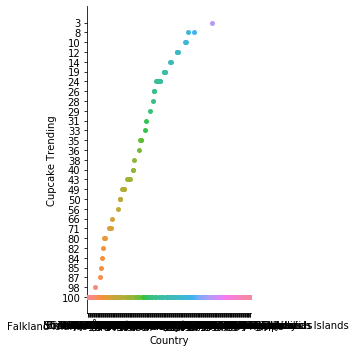

In [57]:
sns.catplot(x="Country", y="Cupcake Trending", kind="swarm", data=data);

In [62]:
data.dtypes

Country             object
Cupcake Trending    object
dtype: object

In [64]:
data['Cupcake Trending'] = data['Cupcake Trending'].apply(pd.to_numeric) 
print(data.dtypes)

Country             object
Cupcake Trending     int64
dtype: object


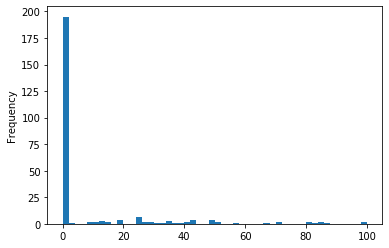

In [65]:
# histogram
data["Cupcake Trending"].plot.hist(bins=50)

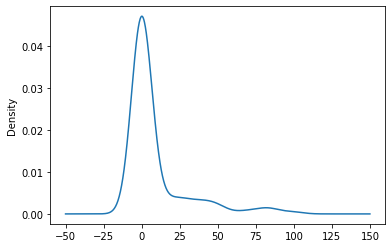

In [66]:
# density plot
data['Cupcake Trending'].plot.density()

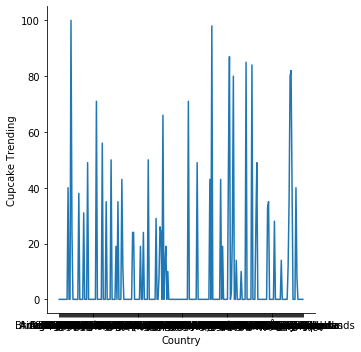

In [67]:
# line plot
sns.relplot(x="Country", y="Cupcake Trending", kind="line", data=data)